# Reading .csv files using pandas

Finding and reading station meteorology data   
https://www.ncdc.noaa.gov/cdo-web/datasets   
I already downloaded the data for Providence (providence_station_daily.csv), and you can find this on Canvas/Files/data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#filename='/Users/jungeunl/class/data/daily_providence.csv' #using Python on my laptop
filename='providence_station_daily.csv'

# Read a file and choose DATE as an index
f = pd.read_csv(filename,index_col=2)
#header becomes the variable name, e.g., f.PRCP
print(f.head(5)) # Read the first 5 lines of the data

                STATION                                        NAME  ACMH  \
DATE                                                                        
1946-10-09  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US   NaN   
1946-10-10  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US   NaN   
1946-10-11  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US   NaN   
1946-10-12  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US   NaN   
1946-10-13  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US   NaN   

            ACSH  AWND  FMTM  PGTM  PRCP  PSUN  SNOW  ...  WT14  WT15  WT16  \
DATE                                                  ...                     
1946-10-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
1946-10-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
1946-10-11   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
1946-10-12   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  

In [6]:
#print(f.shape)   # data shpe
#print(f.dtypes)  # data type
print(f.index)   # index
#print(f.describe())  # basic statistics

Index(['1942-08-01', '1942-08-02', '1942-08-03', '1942-08-04', '1942-08-05',
       '1942-08-06', '1942-08-07', '1942-08-08', '1942-08-09', '1942-08-10',
       ...
       '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
       '2024-11-23', '2024-11-24', '2024-11-25', '2024-11-26', '2024-11-27'],
      dtype='object', name='DATE', length=28245)


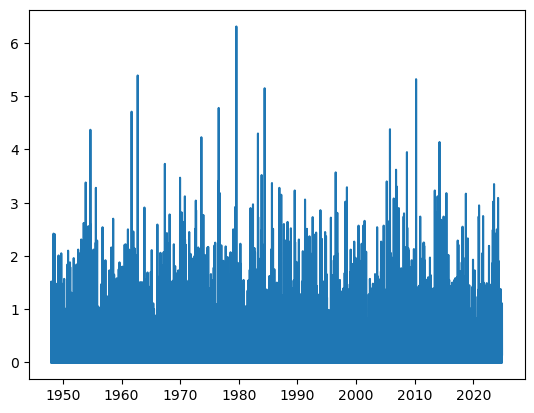

In [7]:
#print f.index
# Example of using time as an index
#print f["2015-03-01":"2015-05-31"]

# Converts to DatetimeArray/Index to write an axis label
# Make index as a standard time unit
f.index=pd.to_datetime(f.index)

# Plot precipitation
plt.plot(f.index,f["PRCP"])

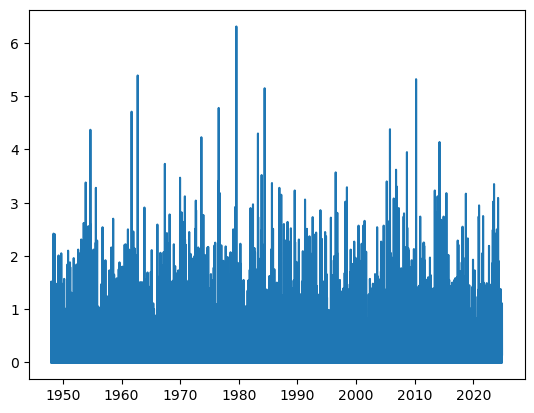

In [8]:
# Another way
plt.plot(f.index,f.PRCP)

In [9]:
# Choose only some specific variables (TAVG, TMAX, TMIN, PRCP) and save them as a.
a=f[['PRCP','TMAX','TMIN','TAVG']]

# calculate multi-monthly average
monb=a.groupby(a.index.month).mean()           

# calculate standard deviation
stdb=a.groupby(a.index.month).std()

print (monb.TAVG)
#print (stdb)

DATE
1     30.250447
2     32.821218
3     39.021700
4     48.988333
5     58.948136
6     68.075000
7     74.337097
8     73.050000
9     66.155000
10    55.033871
11    44.904523
12    36.067912
Name: TAVG, dtype: float64


Text(0.5, 1.0, 'Providence monthly average temperature')

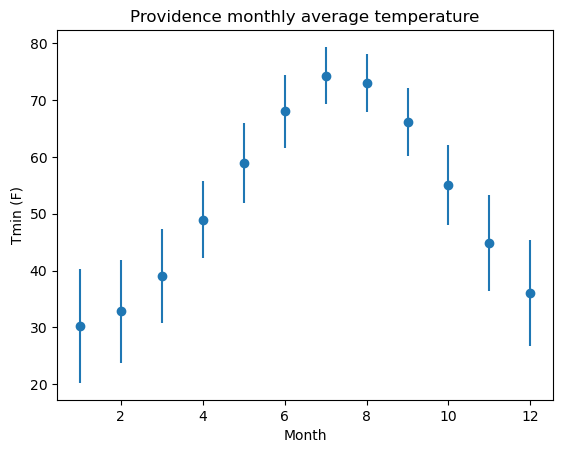

In [10]:
#plt.errorbar(x, y, yerr=yerr, xerr=xerr,fmt='')
plt.errorbar(monb.index,monb.TAVG,yerr=stdb.TAVG,fmt='o')
plt.xlabel('Month')
plt.ylabel('Tmin (F)')
plt.title('Providence monthly average temperature')

In [11]:
# Calculate avarages before year 2000.
b2000=a[:"2000"] 

# calculate multi-monthly average
monb2000=b2000.groupby(b2000.index.month).mean()           

# calculate standard deviation
stdb2000=b2000.groupby(b2000.index.month).std()

In [12]:
# Calculate avarages after year 2000.
a2000=a["2001":]  # after 2001

# calculate multi-monthly average
mona2000=a2000.groupby(a2000.index.month).mean()           

# calculate standard deviation
stda2000=a2000.groupby(a2000.index.month).std()

Text(0.5, 1.0, 'Providence monthly average temperature')

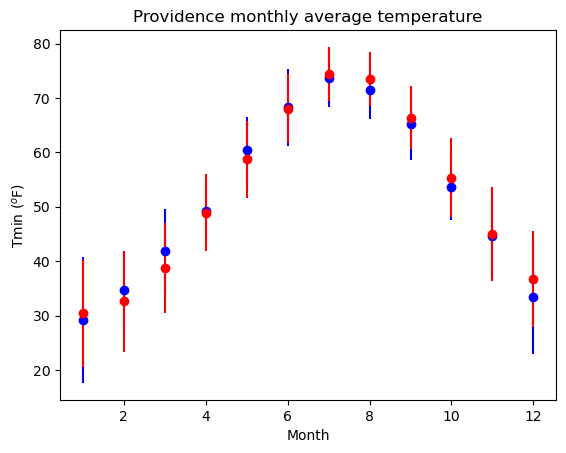

In [13]:
# Plot before and after 2000 for average temperature (TAVG)
plt.errorbar(monb2000.index,monb2000.TAVG,yerr=stdb2000.TAVG,fmt='o', color='b')
plt.errorbar(mona2000.index,mona2000.TAVG,yerr=stda2000.TAVG,fmt='o', color='r')
plt.xlabel('Month')
plt.ylabel('Tmin ($^o$F)')
plt.title('Providence monthly average temperature')

### Exercise
Plot before and after 2000 for minimum temperature (TMIN).

### Exercise
Plot before and after 2000 for maximum temperature (TMAX).

### Exercise
Calculate monthly average precipitation.

### Exercise
Plot before and after 2000 for precipitation (PRCP).

### Exercise
You can find the similar data for Chicago (chicago_station_daily.csv). Please read the data using Pandas (make time as an index; index_col=2) and print the first 5 lines.

### Exercise
Make index as a standard time unit

### Exercise
Plot precipitation.

### Exercise
Calculate monthly average. We could choose only some specific variables (PRCP, TAVG) and save them as d.

### Exercise
Calculate monthly average values and standard deviation.

### Exercise
Plot average temperature for Chicago and Providence.

### Exercise
Plot average precipitation for Chicago and Providence.

### Optional Exercise
Choose another city, download the file from the NOAA site, and plot monthly average temperature (Choose dataset called Daily Summaries).

### Optional Exercise
Plot monthly average precipitation.